Now lets compile the same timing plots with these newly calculated timing constants
## THIS IS NOT EXACT

In [43]:
evwDeltaTvecCorr = []
for i, hi in enumerate(evwDeltaTvec):
    constshift = round(v9_11_partial_timeConstants[i],2)
    binshift = -1*constshift/(evwDeltaTvec[i].GetBinWidth(1))
    hi2 = hi.Clone()
    for bin in range(hi2.GetNbinsX()):
        if(bin-binshift > 0 and bin-binshift < hi.GetNbinsX()):
            hi2.SetBinContent(int(bin), hi.GetBinContent(int(bin-binshift)) )
            
    evwDeltaTvecCorr.append(hi2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


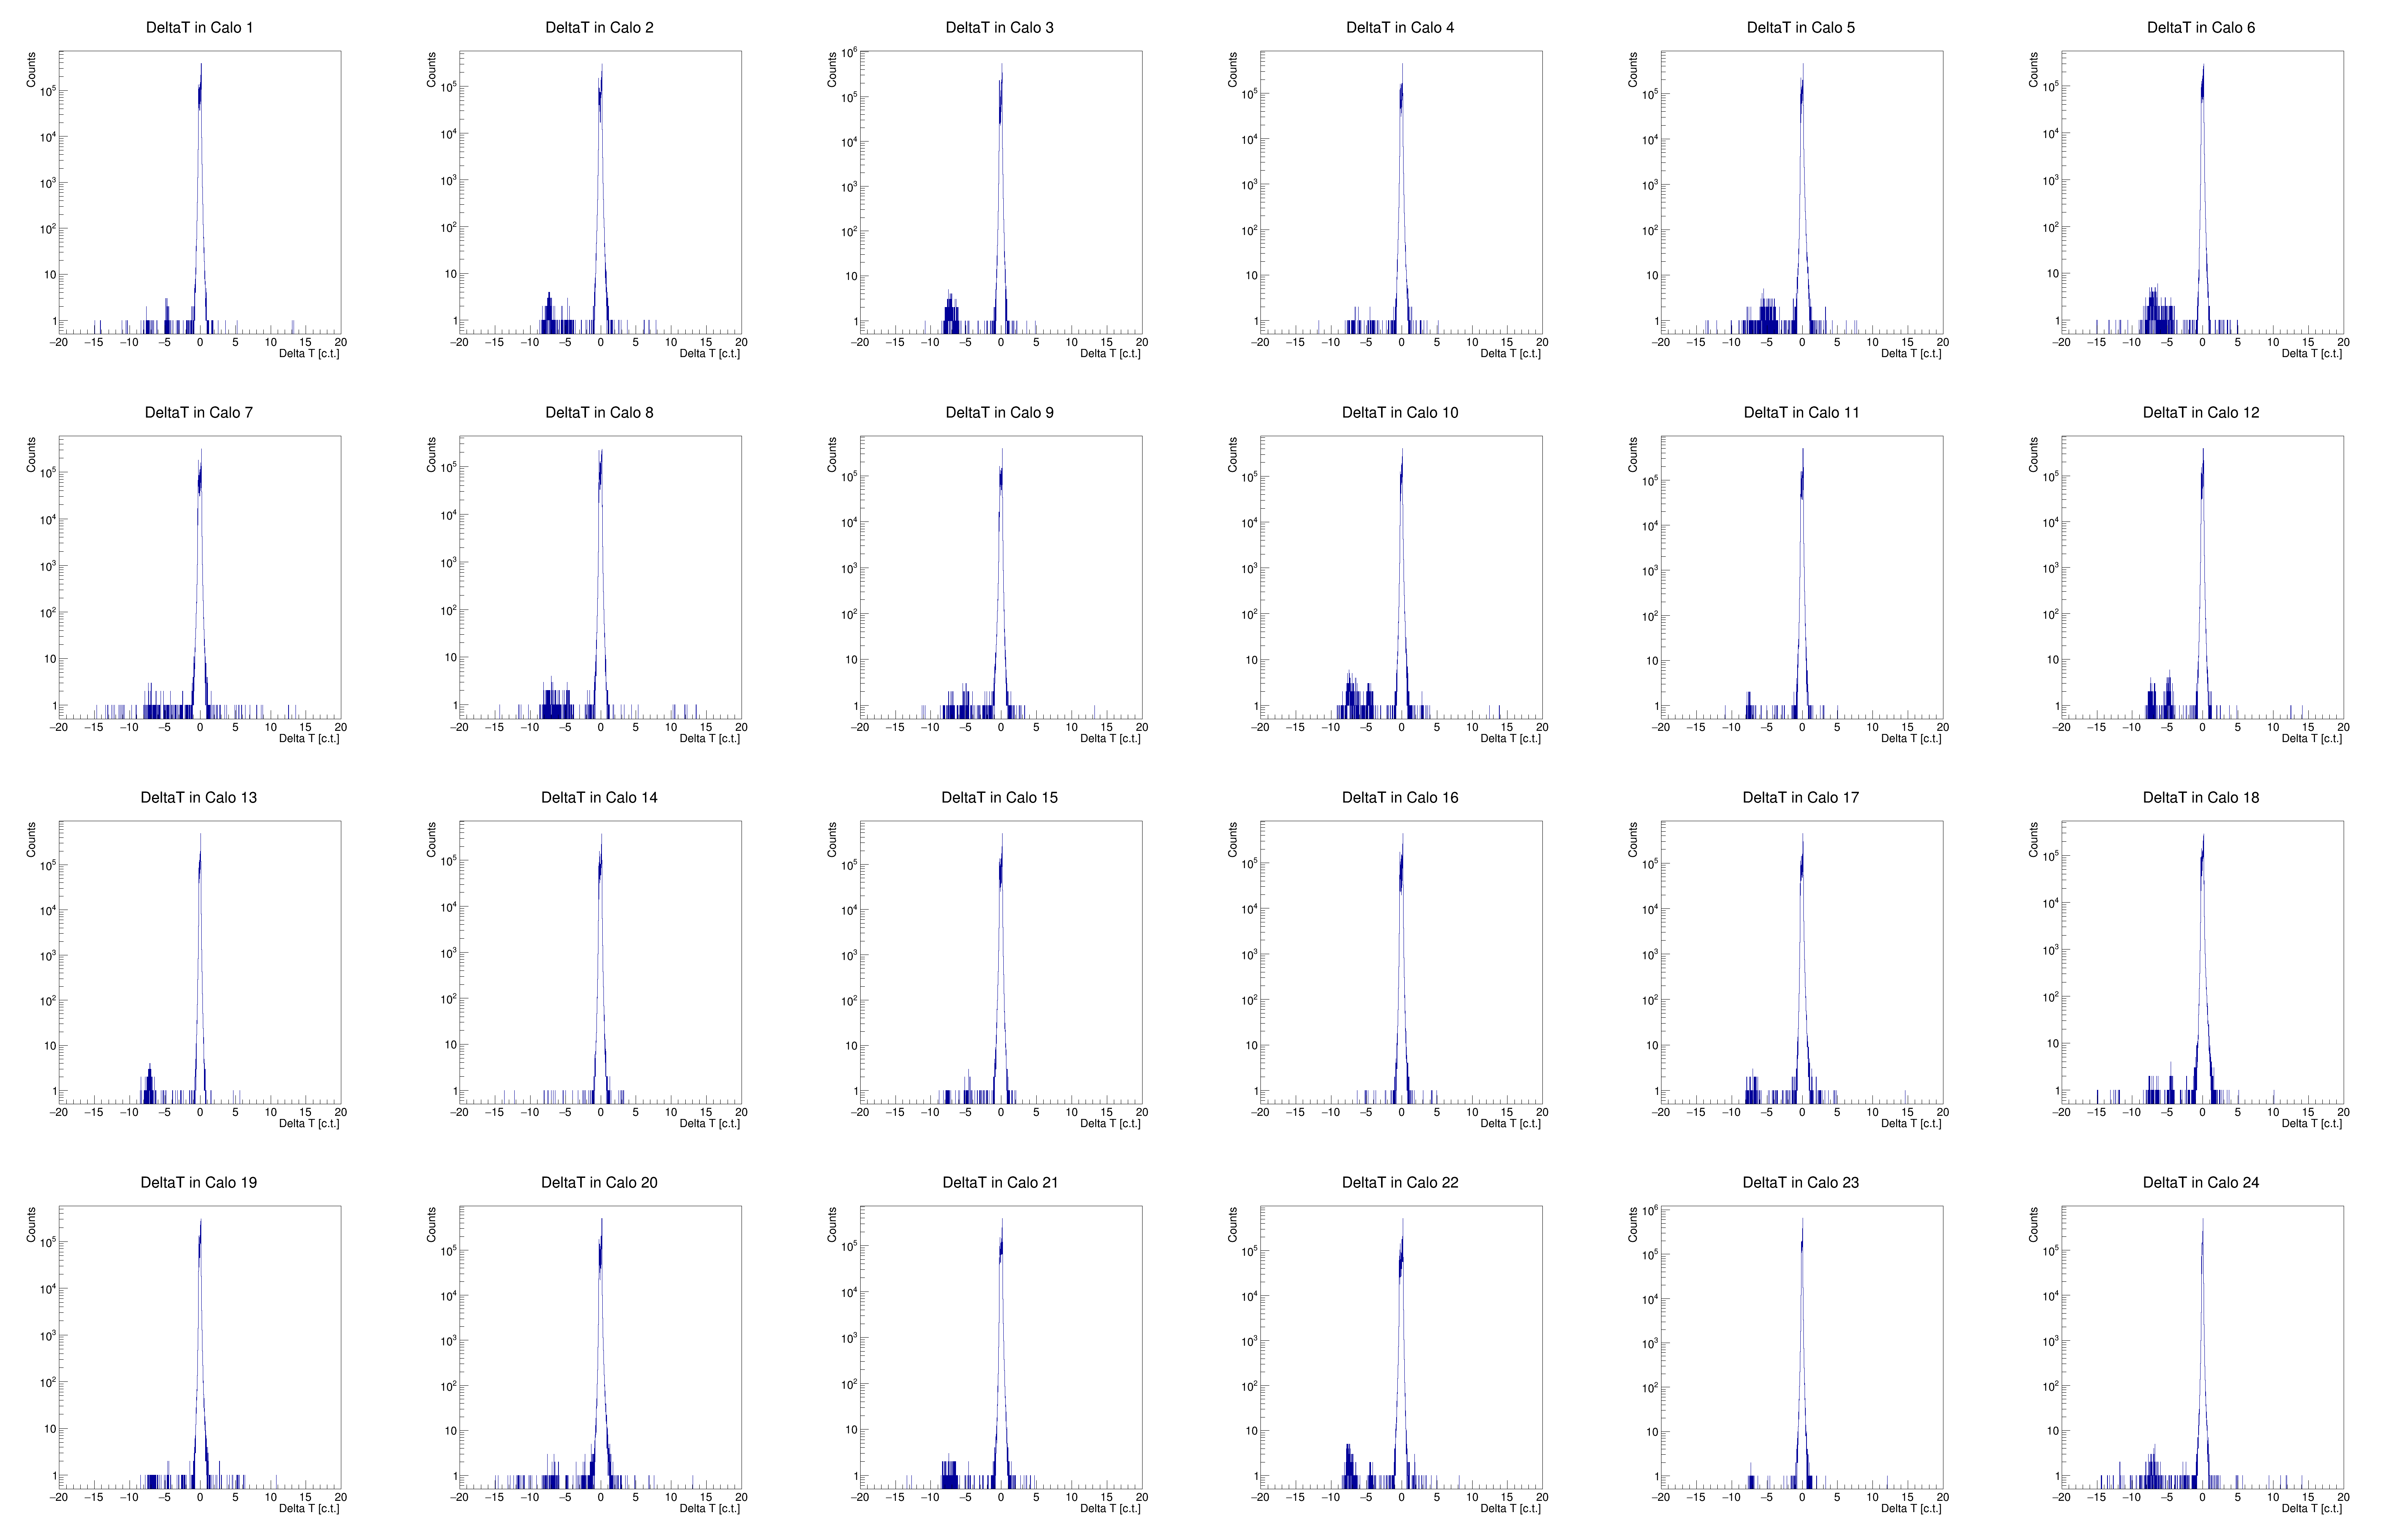

In [44]:
c5 = r.TCanvas("c5","c5",6200,4000)
c5.Divide(6,4)

for i, hist in enumerate(evwDeltaTvecCorr):
    c5.cd(i+1)
    r.gPad.SetLogy()
    #hist.Rebin2D(5,5)
    hist.Draw("COLZ")
        
c5.Draw()
#c5.Print("./c5.root")

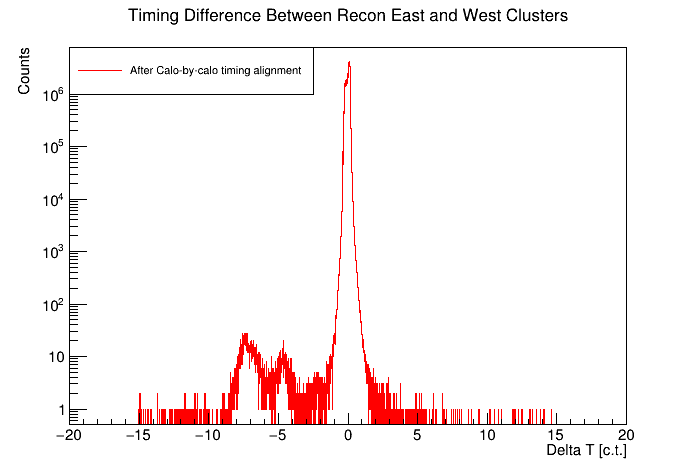

In [45]:
c = r.TCanvas()

evwDeltaTCaloAfterCorr2 = evwDeltaTvecCorr[0].Clone("evwDeltaTCaloAfterCorr2")
for i, hi in enumerate(evwDeltaTvecCorr):
    if i > 0.5:
        evwDeltaTCaloAfterCorr2.Add(hi,1)

evwDeltaTCaloAfterCorr2.SetLineColor(2)
evwDeltaTCaloAfterCorr2.Draw()

#evwDeltaTCaloAfterCorr.GetYaxis().SetRangeUser(0.1,1)
#evwDeltaTCaloAfterCorr.GetXaxis().SetRangeUser(-3,3)
evwDeltaTCaloAfterCorr2.SetTitle("Timing Difference Between Recon East and West Clusters")

evwDeltaTCaloAfterCorr2.Draw()

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(evwDeltaTCaloAfterCorr2 ,"After Calo-by-calo timing alignment", "l")
leg.Draw()

c.SetLogy()
c.Draw()
#c.Print("./c.root")

In [46]:
def peak_fit_bw(x, p):
    return p[0]*r.TMath.BreitWigner(x[0],p[1],p[2]) + p[3]

def peak_fit_cauchy(x, p):
    return p[0] * r.TMath.CauchyDist(x[0], p[1], p[2]) + p[3]

def peak_fit_doubleExp(x, p):
    return p[0] * r.TMath.LaplaceDist(x[0], p[1], p[2]) + p[3]

def peak_fit_voigt(x, p):
    return p[0] * r.TMath.Voigt(x[0], p[1], p[2], int(p[3])) + p[4]

def peak_fit_logGaus(x, p):
    return p[0] * r.TMath.Exp ( r.TMath.Gaus(x[0],p[1],p[2],False) ) + p[3]

def peak_fit_student(x, p):
    return p[0] * r.TMath.Student(p[1], p[2]) + p[3]



func1 = r.TF1("peak1", peak_fit_doubleExp, -3,3,5)
#func1.SetParNames('A','Mean','#gamma','+ C')
func1.SetParameters(1,.4,.1,0)
#func1.SetParLimits(1,.4,.45)
func1.SetLineColor(2)
func1.SetNpx(1000)

 FCN=44.8813 FROM MINOS     STATUS=FAILURE       347 CALLS        1423 TOTAL
                     EDM=8.65322e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.82545e+01   4.54491e-01   0.00000e+00   4.37298e-07
   2  p1          -7.17200e-03   1.27408e-02   0.00000e+00  -2.99747e-05
   3  p2           5.11730e-01   1.56946e-02   0.00000e+00  -1.17109e-05
   4  p3           5.17723e-01   6.45988e-02  -0.00000e+00   2.07453e-06
   5  p4           0.00000e+00   8.00000e+00   8.00000e+00   0.00000e+00
 FCN=44.8813 FROM MINOS     STATUS=FAILURE       334 CALLS        1236 TOTAL
                     EDM=2.46223e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p

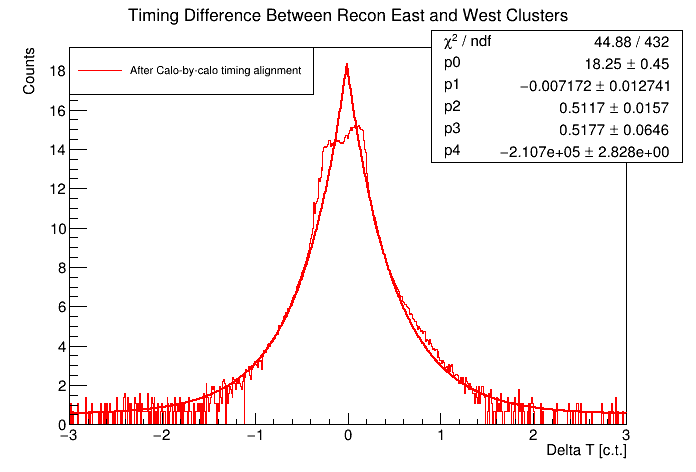

In [47]:
c = r.TCanvas()
evwDeltaTCaloAfterCorr2.SetLineColor(2)
evwDeltaTCaloAfterCorr2.Draw()

#evwDeltaTCaloAfterCorr.GetYaxis().SetRangeUser(0.1,1)
evwDeltaTCaloAfterCorr2.GetXaxis().SetRangeUser(-3,3)

for i in range(evwDeltaTCaloAfterCorr2.GetNbinsX()):
    if i == 0:
        continue
    content = evwDeltaTCaloAfterCorr2.GetBinContent(i)
    newContent = r.TMath.Log(content)
    if(not r.TMath.Finite(newContent)):
        newContent = 0
    #print(content, newContent)

        
    evwDeltaTCaloAfterCorr2.SetBinContent(i, newContent )
    
evwDeltaTCaloAfterCorr2.Draw()

for i in range(2):
    evwDeltaTCaloAfterCorr2.Fit("peak1", "REMB")

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(evwDeltaTCaloAfterCorr2 ,"After Calo-by-calo timing alignment", "l")
leg.Draw()

#c.SetLogy()
c.Draw()
#c.Print("./c.root")

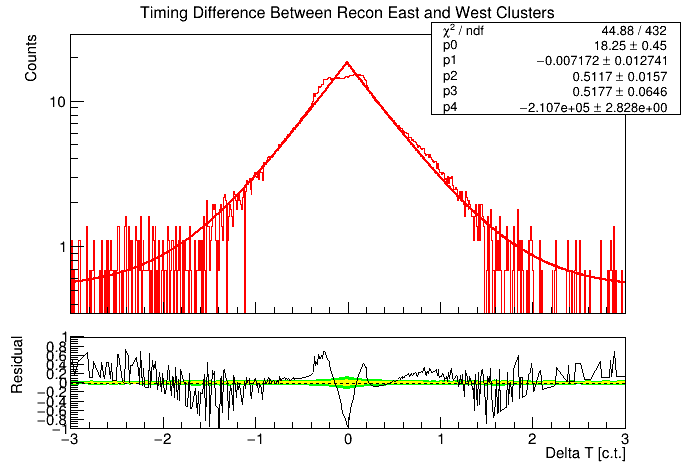

In [48]:
c3 = r.TCanvas()
evwDeltaTCaloAfterCorr2.Draw()
c3.SetLogy()
c3.Draw()

rp13 = r.TRatioPlot(evwDeltaTCaloAfterCorr2)
rp13.Draw()
rp13.GetLowerRefYaxis().SetTitle("Residual")
rp13.GetLowerRefYaxis().SetRangeUser(-1,1)

evwDeltaTCaloAfterCorr2.GetXaxis().SetRangeUser(-3,3)

c3.Update()
c3.Draw()